In [1]:
import numpy as np
import pandas as pd

In [2]:
# path is releted to this folder structure
train_df = pd.read_csv("..\\data\\training\\raw\\train.csv")
test_df = pd.read_csv("..\\data\\training\\raw\\test.csv")

print("shape of train dataset : " , train_df.shape)
print("shape of test dataset : " , test_df.shape)

shape of train dataset :  (1460, 81)
shape of test dataset :  (1459, 80)


In [3]:
numeric_features = train_df.drop(columns = ['Id', 'SalePrice'], axis=1).select_dtypes(include=["int64", "float64"]).columns
categorical_features = train_df.drop(columns = ['Id', 'SalePrice'], axis=1).select_dtypes(include=["object"]).columns

print("Numerical:", len(numeric_features))
print("Categorical:", len(categorical_features))

Numerical: 36
Categorical: 43


mean will be shifted for the LotFrontage and MasVnrArea features that why we'll use Median and for GarageYrBlt mean or median both will be good

In [4]:
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())

In [5]:
# filling this categorical features with specific values because missing values has there own important meaning (i know this because it is already present in the 'data_description.txt' file)

train_df['Alley'] = train_df['Alley'].fillna('No_alley_access')
train_df['GarageType'] = train_df['GarageType'].fillna('No_Garage')
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('None')

# because the hint is available in the 'data_description.txt' file 
train_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")

# here i am filling the mode because only record is missing so it doesnot affect the distribution of the data
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [6]:
# performing ordinal encoding and keep the importantance of missing values 
ordinal_mappings = {

    'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'BsmtQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},
    'BsmtCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'BsmtExposure': {'Gd':4, 'Av':3, 'Mn':2, 'No':1, np.nan:0},

    'BsmtFinType1': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0},
    'BsmtFinType2': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0},

    'HeatingQC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'FireplaceQu': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'GarageFinish': {'Fin':4, 'RFn':3, 'Unf':2, np.nan:1},
    'GarageQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},
    'GarageCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'PavedDrive': {'Y':3, 'P':2, 'N':1},

    'PoolQC': {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, np.nan:0},

    'Fence': {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, np.nan:0}
}

# final replacement
for col, mapping in ordinal_mappings.items():
    if col in train_df.columns:
        train_df[col] = train_df[col].map(mapping)

In [7]:
# no missing values 
train_df.isna().sum() [ train_df.isna().sum() > 0]

Series([], dtype: int64)

In [8]:
# again doing this because we have applied ordinal encoding by replace the category with numbers

numeric_features = train_df.drop(columns = ['Id','SalePrice'], axis=1).select_dtypes(include=["int64", "float64"]).columns
categorical_features = train_df.drop(columns = ['Id','SalePrice'], axis=1).select_dtypes(include=["object"]).columns

print("Numerical:", len(numeric_features))
print("Categorical:", len(categorical_features))

Numerical: 52
Categorical: 27


In [9]:
train_df[numeric_features].corrwith(train_df['SalePrice']).sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
PavedDrive       0.231357
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
PoolQC           0.115484
ScreenPorch      0.111447
PoolArea         0.092404
MoSold      

# Correlation with SalePrice Feature

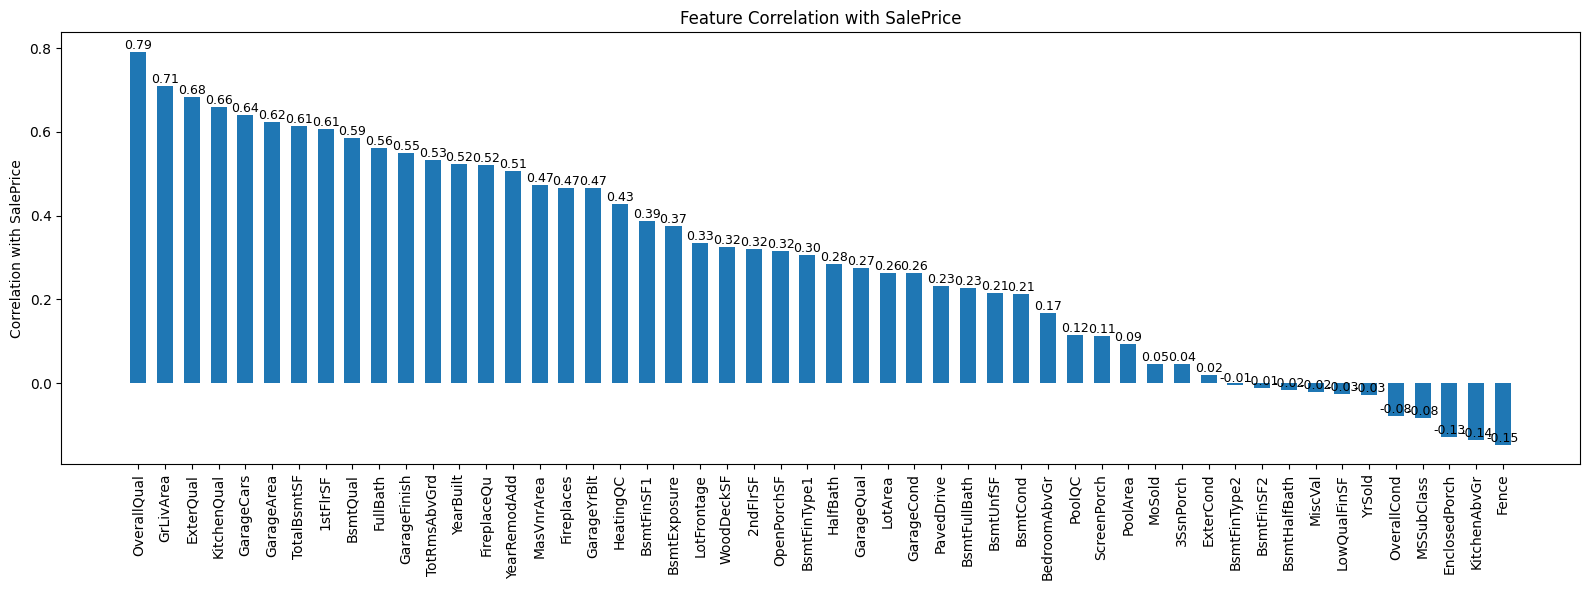

In [10]:
import matplotlib.pyplot as plt

# Calculate correlations
corr_values = (
    train_df[numeric_features]
    .corrwith(train_df['SalePrice'])
    .sort_values(ascending=False)
)

# Create figure with enough space
plt.figure(figsize=(16, 6))

# Plot bars with spacing
bars = plt.bar(
    corr_values.index,
    corr_values.values,
    width=0.6  # smaller width = more space between bars
)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Improve readability
plt.xticks(rotation=90)
plt.ylabel("Correlation with SalePrice")
plt.title("Feature Correlation with SalePrice")
plt.tight_layout()

plt.show()

# OHE

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        (
            'cat',
            OneHotEncoder(
                drop='first',
                handle_unknown='ignore',
                sparse_output=False
            ),
            categorical_features
        ),
        ('num', 'passthrough', numeric_features)
    ]
)

# only we encoding in x features not the target features
x_train_encoded = preprocessor.fit_transform(train_df.drop(columns=['Id', 'SalePrice']))

print("Shape of train dataset after OHE:", x_train_encoded.shape)

Shape of train dataset after OHE: (1460, 210)


In [12]:
model_name = []
rmse_error = []

rmse_data_dict = {
    "model_name" : model_name,
    "rmse_error" : rmse_error
}

# linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# x = train_df_encoded.drop(columns=['Id', 'SalePrice'], axis=1)
# y = np.log1p(train_df_encoded['SalePrice'])

x = x_train_encoded
y = np.log1p(train_df['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# storing for future use
model_name.append("LinearRegression")
rmse_error.append(lr_rmse)

lr_rmse

0.20554185675324718

# Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# x = train_df_encoded.drop(columns = ['Id', 'SalePrice'], axis=1)
# y = np.log1p(train_df_encoded['SalePrice'])

x = x_train_encoded
y = np.log1p(train_df['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=350,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# storing for the future use
model_name.append("RandomForestRegressor")
rmse_error.append(rf_rmse)

rf_rmse

0.14629253234225606

# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# x = train_df_encoded.drop(columns=['Id', 'SalePrice'], axis=1)
# y = np.log1p(train_df_encoded['SalePrice'])

x = x_train_encoded
y = np.log1p(train_df['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.5, random_state=42)

ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_val)
ridge_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# storing for future use
model_name.append("RidgeRegression")
rmse_error.append(ridge_rmse)

ridge_rmse

0.13036929161830296

# XG Boost

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# x = train_df_encoded.drop(columns=['Id', 'SalePrice'], axis=1)
# y = np.log1p(train_df_encoded['SalePrice'])

x = x_train_encoded
y = np.log1p(train_df['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# storing for future use
model_name.append("XGBoostRegressor")
rmse_error.append(xgb_rmse)

xgb_rmse

0.12796984055049768

### Minimum RMSE Error Model

In [17]:
rmse_data_dict = {
    "model_name" : model_name,
    "rmse_error" : rmse_error
}

pd.DataFrame(rmse_data_dict).sort_values(by = 'rmse_error').head(3)

,model_name,rmse_error
3,XGBoostRegressor,0.127970
2,RidgeRegression,0.130369
1,RandomForestRegressor,0.146293


# preparing submission file

In [18]:
test_df = pd.read_csv('..\\data\\training\\raw\\test.csv')
test_df.shape

(1459, 80)

In [19]:
test_numeric_features = test_df.drop(columns = ['Id'], axis=1).select_dtypes(include=["int64", "float64"]).columns
test_categorical_features = test_df.drop(columns = ['Id'], axis=1).select_dtypes(include=["object"]).columns

print("shape of numeric features -> ", len(test_numeric_features))
print("shape of categorical features -> ", len(test_categorical_features))

test_df[test_numeric_features] =test_df[test_numeric_features].fillna(test_df[test_numeric_features].median())

shape of numeric features ->  36
shape of categorical features ->  43


In [20]:
# filling this categorical features with specific values because missing values has there own important meaning (i know this because it is already present in the 'data_description.txt' file)
test_df['Alley'] = test_df['Alley'].fillna('No_alley_access')
test_df['GarageType'] = test_df['GarageType'].fillna('No_Garage')
test_df['MiscFeature'] = test_df['MiscFeature'].fillna('None')

# because the hint is available in the 'data_description.txt' file 
test_df['MasVnrType'] = test_df['MasVnrType'].fillna("None")

# here i am filling the mode because only record is missing so it doesnot affect the distribution of the data
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

In [21]:
# final replacement on test data
for col, mapping in ordinal_mappings.items():
    if col in test_df.columns:
        test_df[col] = test_df[col].map(mapping)

In [22]:
# missing values are remaing in this features 
test_df[test_categorical_features].isna().sum() [test_df[test_categorical_features].isna().sum() > 0]

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

In [23]:
# if left any other missing categorical features then filling with mode values
missing_cat_features = test_df[test_categorical_features].isna().sum() [test_df[test_categorical_features].isna().sum() > 0].index.tolist()

if len(missing_cat_features) > 0:
    test_df[missing_cat_features].fillna(test_df[missing_cat_features].mode().iloc[0])

In [24]:
print("numerical features in test_df -> ", len(test_df.select_dtypes(exclude='object').drop(columns=['Id']).columns.tolist()))
print("categorical features in test_df -> ",len(test_df.select_dtypes(include='object').columns.tolist()))

# output : 
# categorical features in test_df ->  21
# numerical features in test_df ->  58


# again doing this because we have applied ordinal encoding by replace the category with numbers

numeric_features = train_df.drop(columns = ['Id','SalePrice'], axis=1).select_dtypes(include=["int64", "float64"]).columns
categorical_features = train_df.drop(columns = ['Id','SalePrice'], axis=1).select_dtypes(include=["object"]).columns

print("Numerical:", len(numeric_features))
print("Categorical:", len(categorical_features))

# output:
# Numerical: 52
# Categorical: 27


numerical features in test_df ->  52
categorical features in test_df ->  27
Numerical: 52
Categorical: 27


In [25]:
# performing OHE in test dataset
x_test_encoded = preprocessor.transform(test_df.drop(columns=['Id']))
print("Shape of test dataset after OHE:", x_test_encoded.shape)

Shape of test dataset after OHE: (1459, 210)


c:\Users\Manish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5, 15, 16, 22, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [26]:
# using the XGB lowest RMSE error model object to make prediction on the test data
test_predictions = xgb.predict(x_test_encoded)
test_predictions = np.expm1(test_predictions)
test_predictions

array([129542.55, 161306.83, 185061.95, ..., 166822.33, 121426.8 ,
       221046.38], dtype=float32)

In [27]:
# creating submission file for this approach

submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_predictions
})

submission.to_csv("..\\data\\submissions\\new_submission.csv", index=False)

In [28]:
# printing first 5 record of the submission file
submission.head()

,Id,SalePrice
0,1461,129542.546875
1,1462,161306.828125
2,1463,185061.953125
3,1464,192490.921875
4,1465,192915.078125
